# **K Nearest Neighbor**

**K-Nearest Neighbor (KNN)** is a supervised machine learning algorithm used for classification and regression tasks. It classifies a new data point based on how its neighbors (the closest data points in the feature space) are classified. In essence, KNN assigns the class of the majority of its K nearest neighbors to the new point. It’s a non-parametric and lazy learning algorithm, meaning it makes decisions based on the entire dataset rather than assuming a specific structure (non-parametric), and it doesn’t explicitly learn a model during training (lazy learning).

- **Non-parametric**: No assumptions about the data distribution.

- **Lazy learning**: The model simply stores the data and waits until a query (test data) is made before computing anything.

#### When to Use KNN?

KNN is suitable when you have a labeled dataset and you want to classify new, unseen data. However, it is most effective under the following conditions:

- **Small to medium-sized datasets**: KNN can become computationally expensive with large datasets, as it requires scanning through all data points to find the neighbors.

- **Low-dimensional data**: With high-dimensional data, the distance between data points tends to increase, making it harder for the algorithm to distinguish between neighbors (this is known as the curse of dimensionality).

- **Non-linear decision boundaries**: If the decision boundaries between classes are not linear (i.e., they can't be split by a line or hyperplane), KNN can work well since it uses local information.
Balanced classes: KNN works best when the number of samples in each class is roughly equal.

#### How Does KNN Work?

1. **hoose K (the number of neighbors)**: This is a user-defined parameter. Typically, an odd number is chosen to avoid ties in classification. For example, K=3 means the algorithm looks at the 3 nearest neighbors of a data point.

2. **Calculate Distance**: For a new data point, the algorithm calculates the distance between this point and all other points in the training dataset. The most common distance metric used is Euclidean distance.

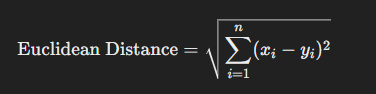

Other distance metrics can be used, like Manhattan distance or Minkowski distance, depending on the dataset and the problem.

3. **Find the K Nearest Neighbors**: After calculating the distance between the new data point and every other point in the dataset, KNN selects the K closest points.

4. Assign a Class or Predict Value:

    - **For classification**: The class label that appears most frequently among the K nearest neighbors is assigned to the new data point.
    - **For regression**: The mean (or sometimes median) of the values of the K nearest neighbors is taken as the predicted value for the new data point.

5. **Result**: The algorithm outputs either the predicted class label (for classification) or a predicted value (for regression).

#### Advantages of KNN:

- **Simple to implement**: KNN requires no assumptions about the underlying data, making it easy to use.

- **Flexible**: Can be used for both classification and regression problems.

- **No training phase**: As a lazy learner, KNN does not require a separate training phase, making it efficient in terms of time before making predictions.

#### Disadvantages of KNN:

- **Computationally expensive**: As it compares every new point with all points in the training data, it can be slow with large datasets.

- **Memory-intensive**: Since the entire dataset needs to be stored, it requires more memory as the dataset grows.

- **Sensitive to irrelevant features**: If the dataset has many irrelevant features, the distance metric may be distorted, leading to poor performance.

- **Sensitive to the choice of K**: A poor choice of K can lead to underfitting (if K is too large) or overfitting (if K is too small).

#### Real-World Applications:

1. **Image Recognition**: KNN can classify images based on similarity, such as facial recognition or object classification.

2. **Recommender Systems**: KNN can be used to find similar items to recommend to users based on their preferences.

3. **Medical Diagnosis**: It’s used to classify diseases based on the symptoms and historical data of patients.

4. **Finance**: KNN is used to detect outliers or categorize financial transactions (e.g., fraud detection).

5. **Document Classification**: Used in text mining to classify documents into predefined categories.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('500hits.csv', encoding="latin-1")
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [3]:
df = df.drop(columns=['PLAYER', 'CS'])
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [6]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1], dtype=int64)

In [11]:
knn.score(X_test, y_test)

0.8279569892473119

## Confusion Matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 12],
       [ 4, 22]], dtype=int64)

## Classification Report

In [15]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.65      0.85      0.73        26

    accuracy                           0.83        93
   macro avg       0.79      0.83      0.80        93
weighted avg       0.85      0.83      0.83        93



In [16]:
print(knn.n_samples_fit_)

372
